In [1]:
from models import Entity, Environment
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

In [3]:
x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

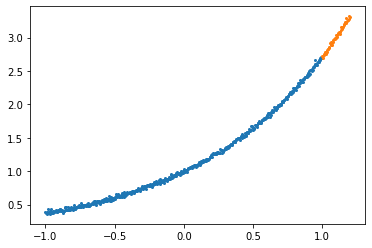

In [4]:
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [5]:
env = Environment(10, train_loader, train_epochs=20, validation_loader=val_loader)

cpu


In [6]:
env.train_epoch()

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [8]:
env.validate_entities()

[0.07184356033802033,
 0.06912306994199753,
 0.3831065344810486,
 0.031331115812063215,
 0.008636052459478379,
 0.5602710342407227,
 0.39804562807083127,
 0.09531796157360077,
 0.14087350130081178,
 8.66833662033081]

In [14]:
m = env.entities[9]
m.gens

{'layers': [{'type': 'Linear', 'in': 1, 'out': 28},
  {'type': 'Linear', 'in': 28, 'out': 1}],
 'criterion': 'MSELoss',
 'optimizer': {'momentum': 0.09682855839956897,
  'name': 'SGD',
  'lr': 0.26212777849082}}

In [9]:
y = m.predict(x_arr.unsqueeze(1))

In [10]:
l = m.loss(y, y_arr.unsqueeze(1))

In [11]:
l.item()

0.0047563910484313965

In [12]:
print(m.gens)

{'layers': [{'type': 'Linear', 'in': 1, 'out': 30}, {'type': 'ReLU', 'in': 30, 'out': 30}, {'type': 'Linear', 'in': 30, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'name': 'Adam', 'lr': 0.16338855773300653}}


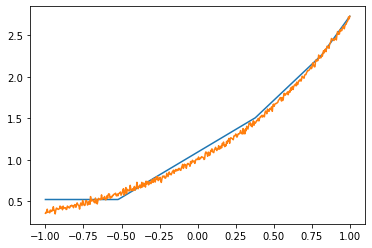

In [13]:
plt.plot(x_arr, y.squeeze(1))
plt.plot(x_arr, y_arr)

In [9]:
env.evo_step()

In [9]:
env.train_epoch()
env.validate_entities()

[0.3510309600830078,
 0.42220210313796996,
 0.02154085651040077,
 0.22963936924934386,
 0.41518909215927124,
 0.6557426261901855,
 0.4206149697303772,
 0.38101759195327756,
 0.9051909351348877,
 0.47223535537719724]

In [10]:
for i in range(10):
    env.train_epoch()
    print(env.validate_entities())
    env.evo_step()
    print(f"Evo step: {i}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x40 and 32x1)

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = mo

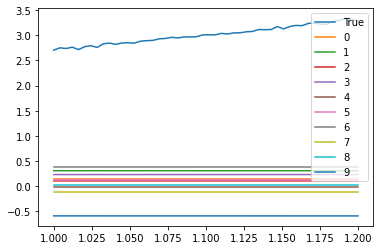

In [27]:
plt.plot(x_val, y_val, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_val.unsqueeze(1))
    plt.plot(x_val, y.squeeze(1), label=str(i))
plt.legend()
plt.show()

In [11]:
env.entities[0].gens

{'layers': [{'type': 'Linear', 'in': 1, 'out': 40},
  {'type': 'Tanh', 'in': 40, 'out': 40},
  {'type': 'ReLU', 'in': 40, 'out': 40},
  {'type': 'Softmax', 'in': 40, 'out': 32},
  {'type': 'Linear', 'in': 32, 'out': 1}],
 'criterion': 'L1Loss',
 'optimizer': {'name': 'Adam', 'lr': 0.22131744918702442}}